In [1]:
# https://machinelearningmastery.com/principal-component-analysis-for-visualization/
# https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/

## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [2]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the wine Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
winedata = datasets.load_wine()
winedata

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


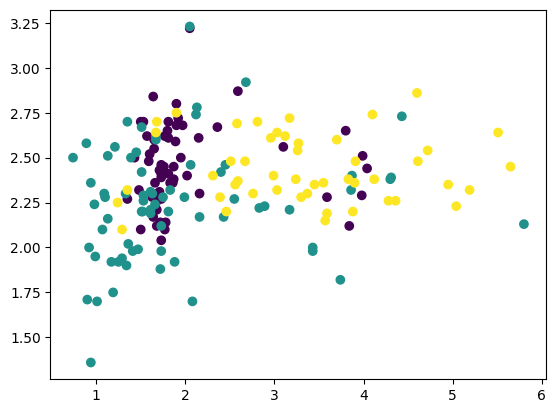

In [5]:
# pick any two features and plot with matplotlib
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

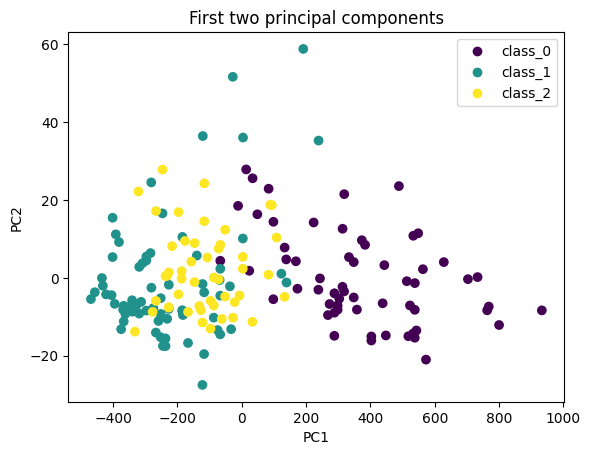

In [6]:
#Applying PCA without scaling
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

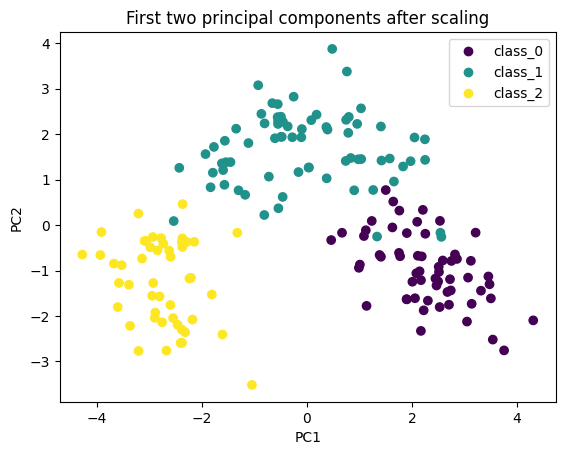

In [7]:
# scaling the data first
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [8]:
# https://www.jcchouinard.com/pca-with-python/

In [9]:
# Create Correlation Coefficients Dataframe

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = winedata.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
feature_names,,,,,,,,,,,,,
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917


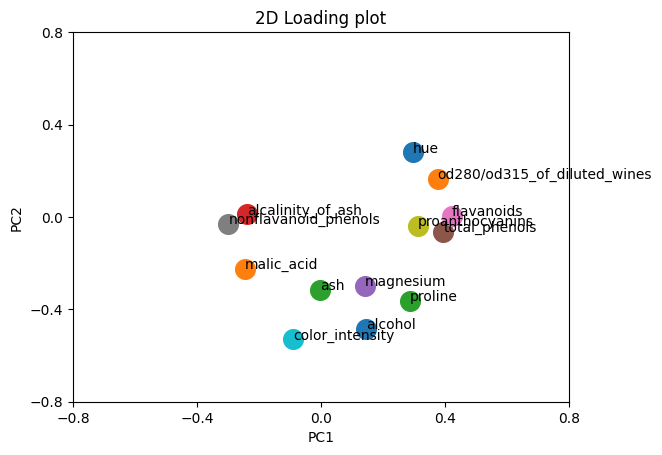

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

Then, we plot the directionality of the correlation by adding arrows from the origin (0, 0) to each of the coefficients.

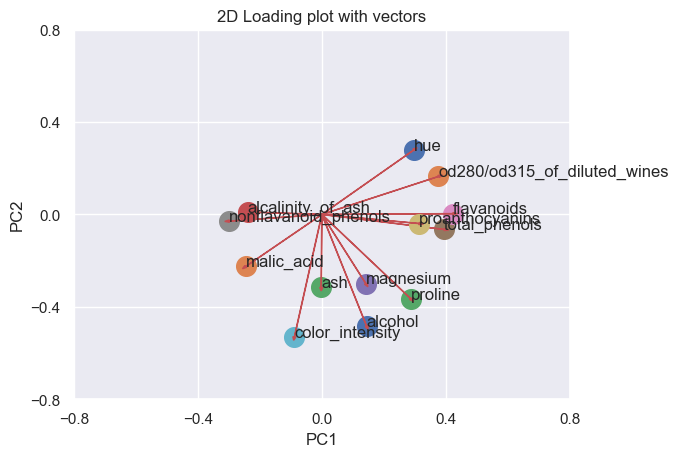

In [12]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

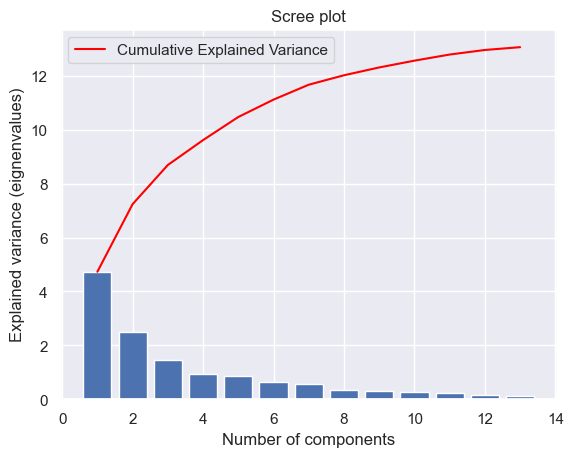

In [11]:
# Scree plot

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA()
 
# Fit and transform data
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.